<a href="https://colab.research.google.com/github/rghmf/Cursos-Alura/blob/main/8_estatistica_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np 

In [ ]:
ensaios = np.array(
[-1, -1],
[1, -1],
[-1, 1],
[1, 1]
)

In [4]:
!pip install pyDOE2

  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25539 sha256=342582d9cfe5d3bd957c38afd327ba96fdb2eec681a49f54e903cf44f03355a8
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built pyDOE2


In [5]:
!pip install numpy 

In [6]:
!pip install scipy

In [7]:
import pyDOE2 as doe

In [8]:
ensaios = doe.ff2n(2)

In [9]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

In [10]:
experimento = pd.DataFrame(ensaios, columns = 
                           ['Farinha', 'Chocolate'])

In [11]:
experimento 

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


In [12]:
experimento['Porcoes'] = [19,37,24,49,]

In [15]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


In [16]:
import seaborn as sns

In [17]:
sns.set_palette('terrain')
sns.set_style('darkgrid')

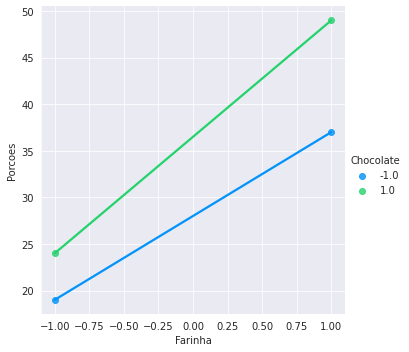

In [22]:
ax1 = sns.lmplot(data = experimento, x = 'Farinha', y = 'Porcoes', ci = None, hue = 'Chocolate')

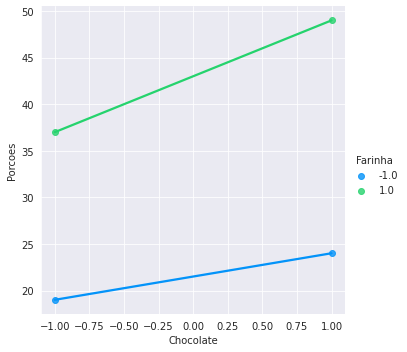

In [23]:
ax2 = sns.lmplot(data = experimento,
                 x = 'Chocolate',
                 y = 'Porcoes',
                 ci = None,
                 hue = 'Farinha')

In [24]:
import statsmodels.api as am 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
import statsmodels.formula.api as smf 

In [26]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [27]:
modelo_ajustado = modelo.fit()

In [28]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 19 Apr 2022   Prob (F-statistic):                nan
Time:                        09:29:52   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


In [32]:
centro = np.array([[0, 0, 29],
                   [0, 0, 30],
                   [0, 0, 29],
                   [0, 0, 30]])

In [33]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate', 'Porcoes'], index = [4,5,6,7])

In [34]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [35]:
experimento = experimento.append(centro_dataframe)

In [36]:
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


In [37]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [38]:
modelo_ajustado = modelo.fit()

In [39]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Tue, 19 Apr 2022   Prob (F-statistic):            0.00152
Time:                        09:52:12   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))
